In [1]:
from pylab import *

In [4]:
!!pip install pydub pillow

['Requirement already satisfied: pydub in /srv/hacks/burda-fit/venv/lib/python2.7/site-packages',
 'Collecting pillow',
 '  Downloading Pillow-4.3.0-cp27-cp27m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (3.5MB)',
 'Collecting olefile (from pillow)',
 '  Downloading olefile-0.44.zip (74kB)',
 'Building wheels for collected packages: olefile',
 '  Running setup.py bdist_wheel for olefile: started',
 "  Running setup.py bdist_wheel for olefile: finished with status 'done'",
 '  Stored in directory: /Users/khomenkos/Library/Caches/pip/wheels/20/58/49/cc7bd00345397059149a10b0259ef38b867935ea2ecff99a9b',
 'Successfully built olefile',
 'Installing collected packages: olefile, pillow',
 'Successfully installed olefile-0.44 pillow-4.3.0']

In [2]:
!! ls

['Sandra.mp3',
 'Untitled.ipynb',
 'audio-playground.ipynb',
 'bensound-actionable.mp3',
 'bensound-anewbeginning.mp3',
 'bensound-goinghigher.mp3',
 'bensound-goinghigher.wav']

In [10]:
from pydub import AudioSegment
from matplotlib import pyplot as plot
from PIL import Image, ImageDraw
import numpy as np
import os

%matplotlib inline

In [15]:
import logging

l = logging.getLogger("pydub.converter")
l.setLevel(logging.DEBUG)
l.addHandler(logging.StreamHandler())


In [3]:
MP3_FILENAME = 'Sandra.mp3'

In [6]:
AudioSegment.from_mp3(MP3_FILENAME)

In [26]:
BARS = 400
BAR_HEIGHT = 400
LINE_WIDTH = 2

In [24]:
def process(data, mode='max'):
    """
    Simple processing of the file
    """
    count = 0
    maximum_item = 0
    raw_data = []
    highest_line = 0
    window_sum = 0
    
    for d in data:
        if count < RATIO:
            count += 1

            max_item = max(abs(d), maximum_item)
            window_sum += abs(d)

        else:
            if mode == 'max':
                window_value = max_item
            elif mode == 'avg':
                window_value = window_sum/RATIO
            else:
                raise NameError
                
            raw_data.append(window_value)
            highest_line = max(max_item, highest_line)

            maximum_item = 0
            window_sum = 0
            count = 1
            
    return highest_line, raw_data

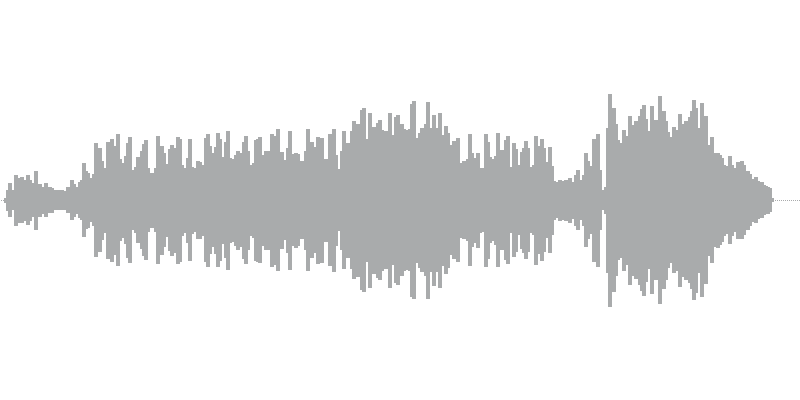

In [27]:
src = MP3_FILENAME

audio = AudioSegment.from_file(src)
data = np.fromstring(audio._data, np.int16)
fs = audio.frame_rate



length = len(data)
RATIO = length/BARS

highest_line, raw_data = process(data, mode='avg')

line_ratio = highest_line/BAR_HEIGHT

im = Image.new('RGBA', (BARS * LINE_WIDTH, BAR_HEIGHT), (255, 255, 255, 1))
draw = ImageDraw.Draw(im)

current_x = 1
for item in raw_data:
    item_height = item/line_ratio

    current_y = (BAR_HEIGHT - item_height)/2
    draw.line((current_x, current_y, current_x, current_y + item_height), fill=(169, 171, 172), width=4)

    current_x = current_x + LINE_WIDTH

im